In [1]:
# lets import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import re
import ipywidgets as widgets
from IPython.display import display

In [2]:
# lets pull in the data from the site
import requests
from bs4 import BeautifulSoup

# lets get the webpage
url = 'https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics/legacy-interest-rate-xml-and-xsd-files'
response = requests.get(url)
html_content = response.text

soup = BeautifulSoup(html_content, 'html.parser')

# Extract data

links = soup.find_all('a')

#lets show what we extracted and see if it looks right
for link in links:
    print(link.get('href'))

#main-content
https://home.treasury.gov/utility/accessibility
https://home.treasury.gov/utility/languages
https://home.treasury.gov/utility/contact
/
/
/about-treasury
/about/general-information
/about/general-information/role-of-the-treasury
/about/general-information/officials
/about/general-information/organizational-chart
/about/general-information/orders-and-directives
https://home.treasury.gov/about/offices
/about/offices/diversity-equity-inclusion-and-accessibility
/about/offices/domestic-finance
/about/offices/economic-policy
/about/offices/general-counsel
/about/offices/international-affairs
/about/offices/management
/about/offices/public-affairs
/about/offices/tax-policy
/about/offices/terrorism-and-financial-intelligence
/services/report-fraud-waste-and-abuse/inspectors-general
/about/bureaus
https://www.ttb.gov/
https://www.moneyfactory.gov/
https://www.fincen.gov/
https://www.fiscal.treasury.gov/
https://www.irs.gov/
https://www.occ.treas.gov/
https://www.usmint.gov/
https

In [3]:
# lets get just the xml data from the site - goes into one of the links
url = 'https://home.treasury.gov/sites/default/files/interest-rates/yield.xml'
response = requests.get(url)
html_content = response.text

# Parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')

all_content = soup.find_all()

for content in all_content:
    print(content)

<qr_bc_cm><list_g_week_of_month><g_week_of_month><week_of_month>2414</week_of_month><list_g_new_date><g_new_date><bid_curve_date>01-APR-24</bid_curve_date><day_of_week>MONDAY   </day_of_week><list_g_bc_cat><g_bc_cat><bc_1month>5.49</bc_1month><bc_2month>5.47</bc_2month><bc_3month>5.44</bc_3month><bc_4month>5.41</bc_4month><bc_6month>5.36</bc_6month><bc_1year>5.06</bc_1year><bc_2year>4.72</bc_2year><bc_3year>4.51</bc_3year><bc_5year>4.34</bc_5year><bc_7year>4.33</bc_7year><bc_10year>4.33</bc_10year><bc_20year>4.58</bc_20year><bc_30year>4.47</bc_30year><bc_30yeardisplay>4.47</bc_30yeardisplay><bond_mkt_unavail></bond_mkt_unavail></g_bc_cat></list_g_bc_cat><new_date>04-01-2024</new_date></g_new_date><g_new_date><bid_curve_date>02-APR-24</bid_curve_date><day_of_week>TUESDAY  </day_of_week><list_g_bc_cat><g_bc_cat><bc_1month>5.49</bc_1month><bc_2month>5.45</bc_2month><bc_3month>5.42</bc_3month><bc_4month>5.4</bc_4month><bc_6month>5.34</bc_6month><bc_1year>5.05</bc_1year><bc_2year>4.7</bc_2y

In [5]:
# lets get a list of the dates from the webpage
url = 'https://home.treasury.gov/sites/default/files/interest-rates/yield.xml'
response = requests.get(url)
html_content = response.text

soup = BeautifulSoup(html_content, 'html.parser')

# Find all occurrences of the G_NEW_DATE block
dates = soup.find_all('G_NEW_DATE')

bid_curve_dates = re.findall(r'<BID_CURVE_DATE>(.*?)</BID_CURVE_DATE>', html_content)

bid_curve_dates

['01-APR-24',
 '02-APR-24',
 '03-APR-24',
 '04-APR-24',
 '05-APR-24',
 '08-APR-24',
 '09-APR-24',
 '10-APR-24',
 '11-APR-24']

In [9]:
# how about we grab all the yield data we are interested in working with?
data_tags = re.findall(r'<(BC_[\dA-Z]+)>([\d.]+)<\/\1>', html_content)

data_tags

[('BC_1MONTH', '5.49'),
 ('BC_2MONTH', '5.47'),
 ('BC_3MONTH', '5.44'),
 ('BC_4MONTH', '5.41'),
 ('BC_6MONTH', '5.36'),
 ('BC_1YEAR', '5.06'),
 ('BC_2YEAR', '4.72'),
 ('BC_3YEAR', '4.51'),
 ('BC_5YEAR', '4.34'),
 ('BC_7YEAR', '4.33'),
 ('BC_10YEAR', '4.33'),
 ('BC_20YEAR', '4.58'),
 ('BC_30YEAR', '4.47'),
 ('BC_30YEARDISPLAY', '4.47'),
 ('BC_1MONTH', '5.49'),
 ('BC_2MONTH', '5.45'),
 ('BC_3MONTH', '5.42'),
 ('BC_4MONTH', '5.4'),
 ('BC_6MONTH', '5.34'),
 ('BC_1YEAR', '5.05'),
 ('BC_2YEAR', '4.7'),
 ('BC_3YEAR', '4.51'),
 ('BC_5YEAR', '4.35'),
 ('BC_7YEAR', '4.37'),
 ('BC_10YEAR', '4.36'),
 ('BC_20YEAR', '4.61'),
 ('BC_30YEAR', '4.51'),
 ('BC_30YEARDISPLAY', '4.51'),
 ('BC_1MONTH', '5.47'),
 ('BC_2MONTH', '5.44'),
 ('BC_3MONTH', '5.42'),
 ('BC_4MONTH', '5.4'),
 ('BC_6MONTH', '5.33'),
 ('BC_1YEAR', '5.03'),
 ('BC_2YEAR', '4.68'),
 ('BC_3YEAR', '4.48'),
 ('BC_5YEAR', '4.34'),
 ('BC_7YEAR', '4.36'),
 ('BC_10YEAR', '4.36'),
 ('BC_20YEAR', '4.61'),
 ('BC_30YEAR', '4.51'),
 ('BC_30YEARDISPLAY'

In [6]:
# tuple with months - conversions
date_month = [1,2,3,4,6,12,24,36,60,84,120,240,360,360]
date_month

[1, 2, 3, 4, 6, 12, 24, 36, 60, 84, 120, 240, 360, 360]

In [10]:
# lets pull all the information together into a data frame so it is easier to work with!
data_dict = {}

# Populate dictionary with column names as keys and corresponding data as values
for key, value in data_tags:
    if key in data_dict:
        data_dict[key].append(value)
    else:
        data_dict[key] = [value]

# lets convert the dictionary into a data frame
bond_df = pd.DataFrame(data_dict)
bond_df.index = bid_curve_dates

bond_df

,BC_1MONTH,BC_2MONTH,BC_3MONTH,BC_4MONTH,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR,BC_30YEARDISPLAY
01-APR-24,5.49,5.47,5.44,5.41,5.36,5.06,4.72,4.51,4.34,4.33,4.33,4.58,4.47,4.47
02-APR-24,5.49,5.45,5.42,5.4,5.34,5.05,4.7,4.51,4.35,4.37,4.36,4.61,4.51,4.51
03-APR-24,5.47,5.44,5.42,5.4,5.33,5.03,4.68,4.48,4.34,4.36,4.36,4.61,4.51,4.51
04-APR-24,5.47,5.49,5.41,5.4,5.32,5,4.65,4.46,4.3,4.31,4.31,4.57,4.47,4.47
05-APR-24,5.47,5.5,5.43,5.41,5.34,5.05,4.73,4.54,4.38,4.39,4.39,4.65,4.54,4.54
08-APR-24,5.48,5.49,5.43,5.41,5.35,5.07,4.78,4.6,4.43,4.43,4.42,4.65,4.55,4.55
09-APR-24,5.48,5.49,5.43,5.41,5.34,5.03,4.74,4.52,4.37,4.38,4.36,4.6,4.5,4.5
10-APR-24,5.49,5.5,5.45,5.44,5.4,5.19,4.97,4.77,4.61,4.59,4.55,4.76,4.64,4.64
11-APR-24,5.48,5.51,5.45,5.44,5.38,5.17,4.93,4.77,4.61,4.6,4.56,4.77,4.65,4.65


In [11]:
# lets add the tuple of month conversion

new_row_dict = dict(zip(bond_df.columns, date_month))

bond_df_edit = pd.concat([bond_df, pd.DataFrame([new_row_dict], index=[''])])
bond_df_edit

,BC_1MONTH,BC_2MONTH,BC_3MONTH,BC_4MONTH,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR,BC_30YEARDISPLAY
01-APR-24,5.49,5.47,5.44,5.41,5.36,5.06,4.72,4.51,4.34,4.33,4.33,4.58,4.47,4.47
02-APR-24,5.49,5.45,5.42,5.4,5.34,5.05,4.7,4.51,4.35,4.37,4.36,4.61,4.51,4.51
03-APR-24,5.47,5.44,5.42,5.4,5.33,5.03,4.68,4.48,4.34,4.36,4.36,4.61,4.51,4.51
04-APR-24,5.47,5.49,5.41,5.4,5.32,5,4.65,4.46,4.3,4.31,4.31,4.57,4.47,4.47
05-APR-24,5.47,5.5,5.43,5.41,5.34,5.05,4.73,4.54,4.38,4.39,4.39,4.65,4.54,4.54
08-APR-24,5.48,5.49,5.43,5.41,5.35,5.07,4.78,4.6,4.43,4.43,4.42,4.65,4.55,4.55
09-APR-24,5.48,5.49,5.43,5.41,5.34,5.03,4.74,4.52,4.37,4.38,4.36,4.6,4.5,4.5
10-APR-24,5.49,5.5,5.45,5.44,5.4,5.19,4.97,4.77,4.61,4.59,4.55,4.76,4.64,4.64
11-APR-24,5.48,5.51,5.45,5.44,5.38,5.17,4.93,4.77,4.61,4.6,4.56,4.77,4.65,4.65
,1,2,3,4,6,12,24,36,60,84,120,240,360,360


In [12]:
# lets check the data types of the columns
bond_df_edit.dtypes

BC_1MONTH           object
BC_2MONTH           object
BC_3MONTH           object
BC_4MONTH           object
BC_6MONTH           object
BC_1YEAR            object
BC_2YEAR            object
BC_3YEAR            object
BC_5YEAR            object
BC_7YEAR            object
BC_10YEAR           object
BC_20YEAR           object
BC_30YEAR           object
BC_30YEARDISPLAY    object
dtype: object

In [13]:
# lets make sure everything is numeric
bond1 = bond_df_edit.apply(pd.to_numeric, errors='coerce')

In [14]:
# lets just look at the data frame 
bond1.head(3)

,BC_1MONTH,BC_2MONTH,BC_3MONTH,BC_4MONTH,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR,BC_30YEARDISPLAY
01-APR-24,5.49,5.47,5.44,5.41,5.36,5.06,4.72,4.51,4.34,4.33,4.33,4.58,4.47,4.47
02-APR-24,5.49,5.45,5.42,5.40,5.34,5.05,4.70,4.51,4.35,4.37,4.36,4.61,4.51,4.51
03-APR-24,5.47,5.44,5.42,5.40,5.33,5.03,4.68,4.48,4.34,4.36,4.36,4.61,4.51,4.51


In [15]:
# lets create some tuples to hold the data afor plotting
first_yields = tuple(bond1.iloc[0])
second_yields = tuple(bond1.iloc[1])
third_yields = tuple(bond1.iloc[2])
fourth_yields = tuple(bond1.iloc[3])
fifth_yields = tuple(bond1.iloc[4])
sixth_yields = tuple(bond1.iloc[5])
seventh_yields = tuple(bond1.iloc[6])
maturity = tuple(bond1.iloc[-1])


In [16]:
# lets create the data frame with the yields
dfmore = pd.DataFrame({'Months': maturity, 'Yields_4_1': first_yields, 'Yields_4_2': second_yields,'Yields_4_3': third_yields,
                  'Yields_4_4': fourth_yields,'Yields_4_5': fifth_yields,'Yields_4_8': sixth_yields, 
                       'Yields_4_9': seventh_yields})

dfmore['Yields_4_1'] = dfmore['Yields_4_1']/100
dfmore['Yields_4_2'] = dfmore['Yields_4_2']/100
dfmore['Yields_4_3'] = dfmore['Yields_4_3']/100
dfmore['Yields_4_4'] = dfmore['Yields_4_4']/100
dfmore['Yields_4_5'] = dfmore['Yields_4_5']/100
dfmore['Yields_4_8'] = dfmore['Yields_4_8']/100
dfmore['Yields_4_9'] = dfmore['Yields_4_9']/100

dfmore.drop(dfmore.index[-1], inplace=True)
dfmore

,Months,Yields_4_1,Yields_4_2,Yields_4_3,Yields_4_4,Yields_4_5,Yields_4_8,Yields_4_9
0,1.0,0.0549,0.0549,0.0547,0.0547,0.0547,0.0548,0.0548
1,2.0,0.0547,0.0545,0.0544,0.0549,0.0550,0.0549,0.0549
2,3.0,0.0544,0.0542,0.0542,0.0541,0.0543,0.0543,0.0543
3,4.0,0.0541,0.0540,0.0540,0.0540,0.0541,0.0541,0.0541
4,6.0,0.0536,0.0534,0.0533,0.0532,0.0534,0.0535,0.0534
5,12.0,0.0506,0.0505,0.0503,0.0500,0.0505,0.0507,0.0503
6,24.0,0.0472,0.0470,0.0468,0.0465,0.0473,0.0478,0.0474
7,36.0,0.0451,0.0451,0.0448,0.0446,0.0454,0.0460,0.0452
8,60.0,0.0434,0.0435,0.0434,0.0430,0.0438,0.0443,0.0437
9,84.0,0.0433,0.0437,0.0436,0.0431,0.0439,0.0443,0.0438


In [17]:
# add transformation to get zero rates, df 
dfmore['Yield_Month41'] = dfmore['Yields_4_1']/12

dfmore['Discount_Factor41'] = 1/((1+ dfmore['Yield_Month41'])**dfmore['Months'])

dfmore['Ln_Discount_Factor41'] = np.log(dfmore['Discount_Factor41'])

dfmore['Zero41'] = (1 + dfmore['Yield_Month41'])**12 - 1

# add another day yields transformations
dfmore['Yield_Month42'] = dfmore['Yields_4_2']/12

dfmore['Discount_Factor42'] = 1/((1+ dfmore['Yield_Month42'])**dfmore['Months'])

dfmore['Ln_Discount_Factor42'] = np.log(dfmore['Discount_Factor42'])

dfmore['Zero42'] = (1 + dfmore['Yield_Month42'])**12 - 1

#april 3
dfmore['Yield_Month43'] = dfmore['Yields_4_3']/12

dfmore['Discount_Factor43'] = 1/((1+ dfmore['Yield_Month43'])**dfmore['Months'])

dfmore['Ln_Discount_Factor43'] = np.log(dfmore['Discount_Factor43'])

dfmore['Zero43'] = (1 + dfmore['Yield_Month43'])**12 - 1

#april 4
dfmore['Yield_Month44'] = dfmore['Yields_4_4']/12

dfmore['Discount_Factor44'] = 1/((1+ dfmore['Yield_Month44'])**dfmore['Months'])

dfmore['Ln_Discount_Factor44'] = np.log(dfmore['Discount_Factor44'])

dfmore['Zero44'] = (1 + dfmore['Yield_Month44'])**12 - 1

# april 5
dfmore['Yield_Month45'] = dfmore['Yields_4_5']/12

dfmore['Discount_Factor45'] = 1/((1+ dfmore['Yield_Month45'])**dfmore['Months'])

dfmore['Ln_Discount_Factor45'] = np.log(dfmore['Discount_Factor45'])

dfmore['Zero45'] = (1 + dfmore['Yield_Month45'])**12 - 1

# april 8
dfmore['Yield_Month48'] = dfmore['Yields_4_8']/12

dfmore['Discount_Factor48'] = 1/((1+ dfmore['Yield_Month48'])**dfmore['Months'])

dfmore['Ln_Discount_Factor48'] = np.log(dfmore['Discount_Factor48'])

dfmore['Zero48'] = (1 + dfmore['Yield_Month48'])**12 - 1

# april 9
dfmore['Yield_Month49'] = dfmore['Yields_4_9']/12

dfmore['Discount_Factor49'] = 1/((1+ dfmore['Yield_Month49'])**dfmore['Months'])

dfmore['Ln_Discount_Factor49'] = np.log(dfmore['Discount_Factor49'])

dfmore['Zero49'] = (1 + dfmore['Yield_Month49'])**12 - 1

#lets look at the df
dfmore.head(5)

,Months,Yields_4_1,Yields_4_2,Yields_4_3,Yields_4_4,Yields_4_5,Yields_4_8,Yields_4_9,Yield_Month41,Discount_Factor41,...,Ln_Discount_Factor45,Zero45,Yield_Month48,Discount_Factor48,Ln_Discount_Factor48,Zero48,Yield_Month49,Discount_Factor49,Ln_Discount_Factor49,Zero49
0,1.0,0.0549,0.0549,0.0547,0.0547,0.0547,0.0548,0.0548,0.004575,0.995446,...,-0.004548,0.056092,0.004567,0.995454,-0.004556,0.056198,0.004567,0.995454,-0.004556,0.056198
1,2.0,0.0547,0.0545,0.0544,0.0549,0.0550,0.0549,0.0549,0.004558,0.990945,...,-0.009146,0.056408,0.004575,0.990912,-0.009129,0.056303,0.004575,0.990912,-0.009129,0.056303
2,3.0,0.0544,0.0542,0.0542,0.0541,0.0543,0.0543,0.0543,0.004533,0.986522,...,-0.013544,0.055672,0.004525,0.986547,-0.013544,0.055672,0.004525,0.986547,-0.013544,0.055672
3,4.0,0.0541,0.0540,0.0540,0.0540,0.0541,0.0541,0.0541,0.004508,0.982168,...,-0.017993,0.055462,0.004508,0.982168,-0.017993,0.055462,0.004508,0.982168,-0.017993,0.055462
4,6.0,0.0536,0.0534,0.0533,0.0532,0.0534,0.0535,0.0534,0.004467,0.973614,...,-0.026641,0.054727,0.004458,0.973662,-0.026691,0.054832,0.004450,0.973711,-0.026641,0.054727


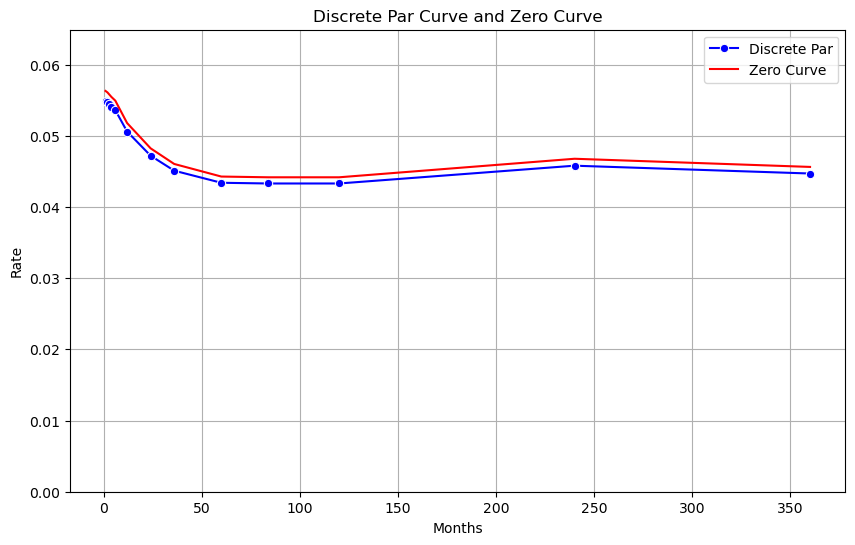

In [18]:
#lets plot the curves with seaborn
plt.figure(figsize=(10, 6))

sns.lineplot(data=dfmore, x='Months', y='Yields_4_1', color='blue',marker='o', label='Discrete Par')

sns.lineplot(data=dfmore, x='Months', y='Zero41', color='red', label='Zero Curve')

# Set plot title and labels
plt.title('Discrete Par Curve and Zero Curve')
plt.xlabel('Months')
plt.ylabel('Rate')
plt.ylim(0, max(dfmore['Yields_4_1'])+.01)
plt.grid(True)
plt.legend()

plt.show()

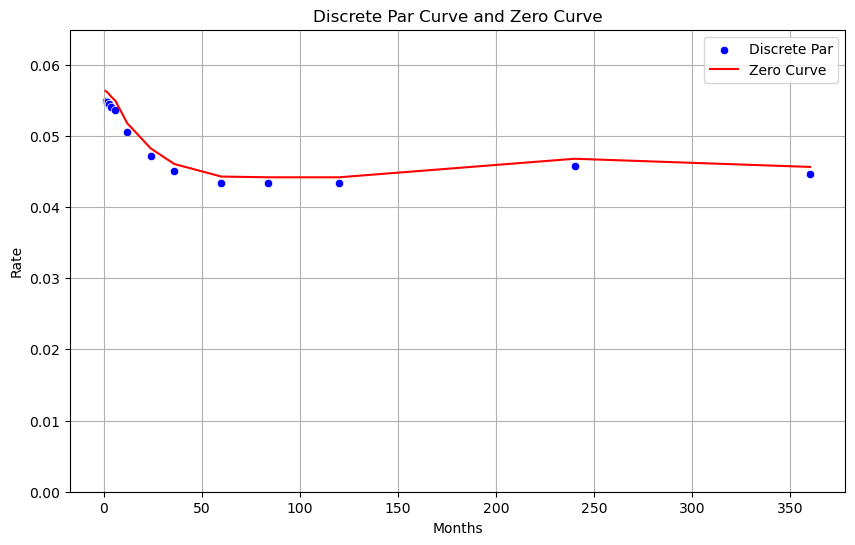

In [21]:
# same plot but as a method
def plot_curves_simple(df):
    """
    Plots the Discrete Par Curve and Zero Curve from the given DataFrame.
    
    Parameters:
        df (DataFrame): DataFrame containing the data to plot.
    """
    # Plot the curves with seaborn
    plt.figure(figsize=(10, 6))

    # Discrete Par Curve
    sns.scatterplot(data=df, x='Months', y='Yields_4_1', color='blue', label='Discrete Par')

    # Zero Curve
    sns.lineplot(data=df, x='Months', y='Zero41', color='red', label='Zero Curve')

    # Set plot title and labels
    plt.title('Discrete Par Curve and Zero Curve')
    plt.xlabel('Months')
    plt.ylabel('Rate')
    plt.ylim(0, max(df['Yields_4_1']) + 0.01)
    plt.grid(True)
    plt.legend()

    plt.show()
    
# then call the method
plot_curves_simple(dfmore)

Dropdown(description='Discrete Par Curve', options=('Yields_4_1', 'Yields_4_2', 'Yields_4_3', 'Yields_4_4Yield…

Dropdown(description='Continuous Zero Rates', options=('Zero41', 'Zero42', 'Zero43', 'Zero44', 'Zero45', 'Zero…

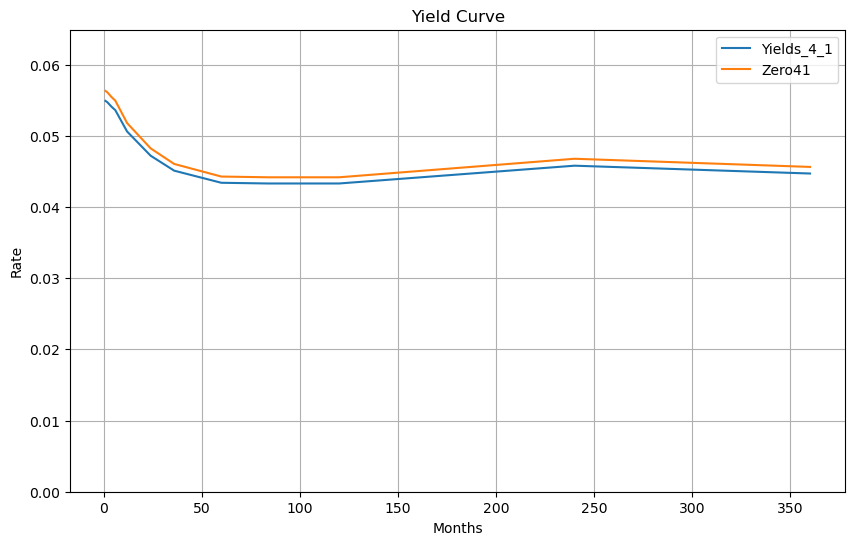

In [28]:
# lets add some interactivity - user will be able to adjust for date?

def update_plot(y_field1, y_field2):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=dfmore, x='Months', y=y_field1, label=y_field1)
    sns.lineplot(data=dfmore, x='Months', y=y_field2, label=y_field2)
    plt.title(f'Yield Curve')
    plt.xlabel('Months')
    plt.ylabel('Rate')
    plt.ylim(0, max(dfmore['Yields_4_1'])+.01)
    plt.grid(True)
    plt.legend()
    plt.show()

# make the dropdown menus
y_dropdown1 = widgets.Dropdown(options=['Yields_4_1', 'Yields_4_2','Yields_4_3','Yields_4_4'
                                       'Yields_4_5','Yields_4_8','Yields_4_9'], description='Discrete Par Curve')
y_dropdown2 = widgets.Dropdown(options=['Zero41', 'Zero42','Zero43', 'Zero44',
                                        'Zero45','Zero48','Zero49'], description='Continuous Zero Rates')

display(y_dropdown1)
display(y_dropdown2)

# Create initial plot
update_plot('Yields_4_1', 'Zero41')

# Define the event handler for dropdown change
def dropdown_eventhandler(change):
    update_plot(y_dropdown1.value, y_dropdown2.value)

y_dropdown1.observe(dropdown_eventhandler, names='value')
y_dropdown2.observe(dropdown_eventhandler, names='value')

In [22]:
# using pickle to pack up method
import pickle
with open('plot_the_curves.pickle','wb' ) as f:
    pickle.dump(plot_curves_simple,f)


In [23]:
# use json to pack up data frame
import json
#with open('yield_curves.json', 'w') as
dfmore.to_json('yield_curves.json', orient='records')